# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

Use the recent know datetime in the dataset to estimate the age of customers

You have two days to do this study

# Import

## Import des librairies

In [1]:
# Classic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imputer
from sklearn.impute import SimpleImputer

# Scaling 
from sklearn.preprocessing import StandardScaler

# Encoder 
from sklearn.preprocessing import OneHotEncoder

# Model 
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples

# t-SNE plot
from sklearn.manifold import TSNE

# Feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# warnings
import warnings
warnings.filterwarnings("ignore")

## Import des données

In [2]:
campaign_df = pd.read_csv('data/marketing_campaign.csv', sep="\t")
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
campaign_df.shape

(2240, 29)

# EDA

## Basic info

In [4]:
campaign_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
campaign_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Dupliated

In [7]:
campaign_df.duplicated().sum()

0

In [8]:
# sur la colonne ID
campaign_df["ID"].duplicated().sum()

0

In [9]:
# Vérifier si la colonne ID contient des valeurs dupliquées
if campaign_df['ID'].duplicated().any():
    print("La colonne ID contient des valeurs dupliquées.")
else:
    print("La colonne ID ne contient pas de valeurs dupliquées.")

La colonne ID ne contient pas de valeurs dupliquées.


## Missing values

In [10]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(campaign_df[['Income']])
campaign_df['Income'] = imputer.transform(campaign_df[['Income']])

In [11]:
campaign_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Modif / Create columns

In [12]:
campaign_df['Dt_Customer'] = pd.to_datetime(campaign_df['Dt_Customer'])
campaign_df['Dt_Customer_year']=pd.DatetimeIndex(campaign_df['Dt_Customer']).year
campaign_df["Age"] = 2014 - campaign_df["Year_Birth"]

In [13]:
campaign_df['Age_bins'] = pd.cut(x=campaign_df['Age'], bins=[10, 30, 50,
                                          70, 90,110,130],labels =["10-30" ,"30-50" ,
                                                                    "50-70" , "70-90", 
                                                                    "90-110","110+"])

In [14]:
campaign_df['Income_bins'] = pd.cut(x=campaign_df['Income'],
                               bins=[10000, 20000, 30000, 40000,50000,60000,70000,80000,90000,100000],
                               labels =["10000-20000" ,"20001-30000" , "30001-40000", "40001-50000","50001-60000" ,
                                        "60001-70000", "70001-80000", "80001-90000", "90000+"])

In [15]:
campaign_df[["Dt_Customer", "Dt_Customer_year", "Age", "Age_bins", "Income_bins"]]

,Dt_Customer,Dt_Customer_year,Age,Age_bins,Income_bins
0,2012-04-09,2012,57,50-70,50001-60000
1,2014-08-03,2014,60,50-70,40001-50000
2,2013-08-21,2013,49,30-50,70001-80000
3,2014-10-02,2014,30,10-30,20001-30000
4,2014-01-19,2014,33,30-50,50001-60000
...,...,...,...,...,...
2235,2013-06-13,2013,47,30-50,60001-70000
2236,2014-10-06,2014,68,50-70,60001-70000
2237,2014-01-25,2014,33,30-50,50001-60000
2238,2014-01-24,2014,58,50-70,60001-70000


## Outliers

<AxesSubplot:xlabel='Income'>

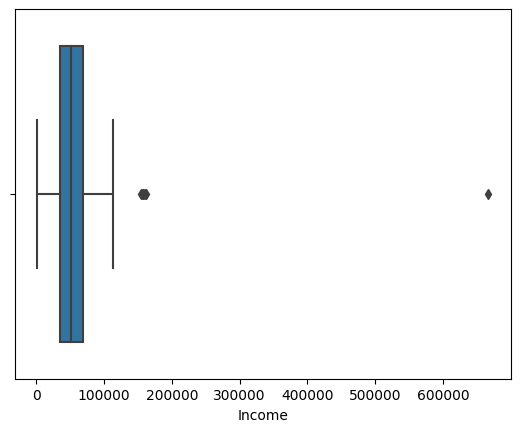

In [16]:
sns.boxplot(x = campaign_df["Income"])

<AxesSubplot:xlabel='Age'>

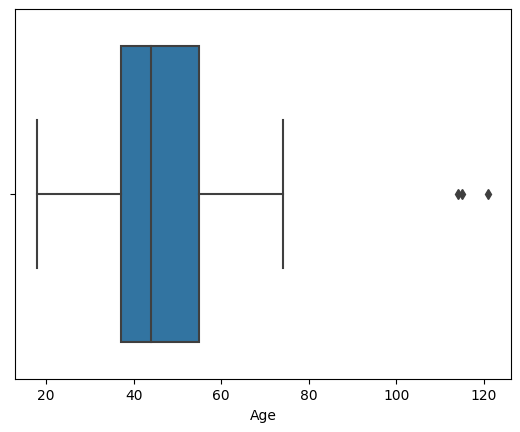

In [17]:
sns.boxplot(x = campaign_df["Age"])

In [18]:
campaign_df = campaign_df.loc[(campaign_df["Income"] < 200000) & (campaign_df["Age"] < 80)]

## Encoding

In [19]:
#One Hot Encoder
enc = OneHotEncoder(sparse=False, drop = "if_binary").fit(campaign_df[['Education','Marital_Status']])
encoded = enc.transform(campaign_df[['Education','Marital_Status']])
enc_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())

# append the one hot encoded columns to the original dataframe
campaign_df_one_hot = pd.concat([campaign_df,enc_df],axis=1)

# drop the originals categoricals variable column
encoded_df = campaign_df_one_hot.drop(['Education','Marital_Status'], axis=1)

encoded_df = encoded_df.dropna()

# print the first 5 rows of the encoded dataset
display(encoded_df.head())

In [20]:
# encoded_df = campaign_df

# Visualisation

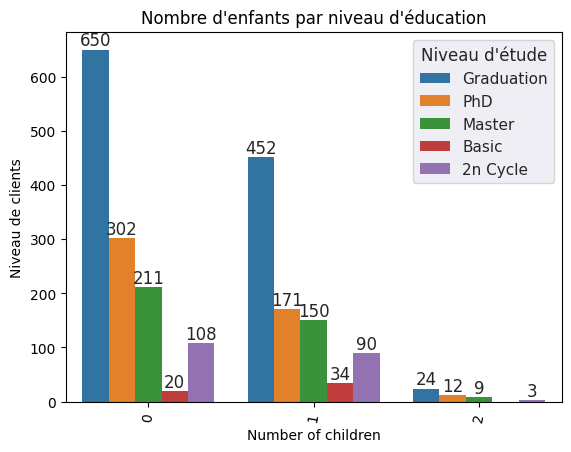

In [21]:
e = sns.countplot(data=campaign_df, x="Kidhome",hue = "Education")
sns.set_theme(context='notebook', style='darkgrid', palette="flare",font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.xlabel("Number of children")
plt.ylabel("Niveau de clients")
plt.legend(title="Niveau d'étude")
plt.title("Nombre d'enfants par niveau d'éducation")
e.bar_label(e.containers[0])
e.bar_label(e.containers[1])
e.bar_label(e.containers[2])
e.bar_label(e.containers[3])
e.bar_label(e.containers[4])
plt.xticks(rotation=80)
plt.show()

Text(0, 0.5, 'Nombre de visites sur le site Web au cours du dernier mois')

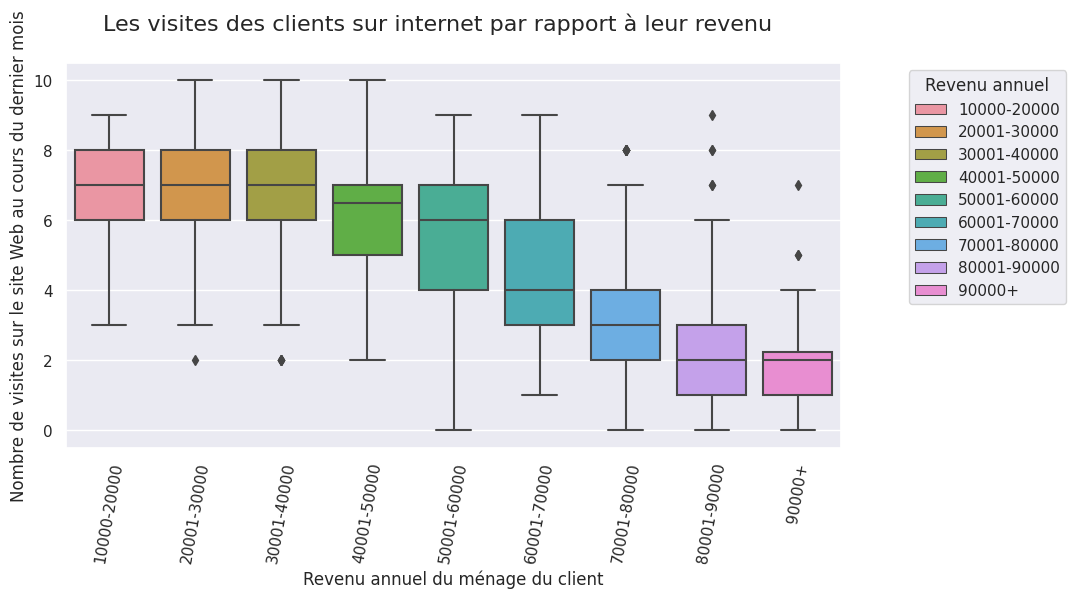

In [22]:
campaign_df['Income_bins'] = pd.cut(x=campaign_df['Income'],
                               bins=[10000, 20000, 30000, 40000,50000,60000,70000,80000,90000,100000],
                               labels =["10000-20000" ,"20001-30000" , "30001-40000", "40001-50000","50001-60000" ,
                                        "60001-70000", "70001-80000", "80001-90000", "90000+"])

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='Income_bins', y='NumWebVisitsMonth', data=campaign_df, hue='Income_bins',  dodge=False)
plt.legend(title = 'Revenu annuel')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))
f.suptitle('Les visites des clients sur internet par rapport à leur revenu ', fontsize=16)
plt.xticks(rotation=80)
plt.xlabel("Revenu annuel du ménage du client")
plt.ylabel("Nombre de visites sur le site Web au cours du dernier mois")

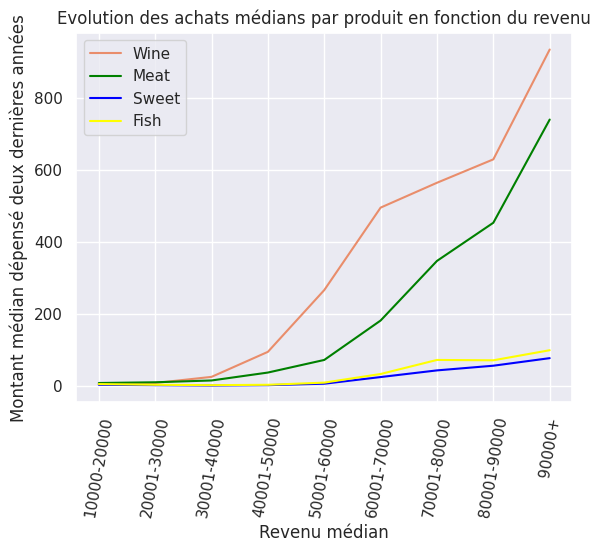

In [23]:
test = campaign_df.groupby('Income_bins').median().reset_index()
test = test[["Income_bins","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts"]]
sns.lineplot(data = test, x="Income_bins",y="MntWines")
sns.lineplot(data = test, x="Income_bins",y="MntMeatProducts",color = "green")
sns.lineplot(data = test, x="Income_bins",y="MntSweetProducts",color = "blue")
sns.lineplot(data = test, x="Income_bins",y="MntFishProducts",color = "yellow")
plt.legend(labels = ["Wine","Meat","Sweet","Fish"])
plt.xlabel("Revenu médian")
plt.title("Evolution des achats médians par produit en fonction du revenu")
plt.ylabel("Montant médian dépensé deux dernières années")
plt.xticks(rotation=80)
plt.show()

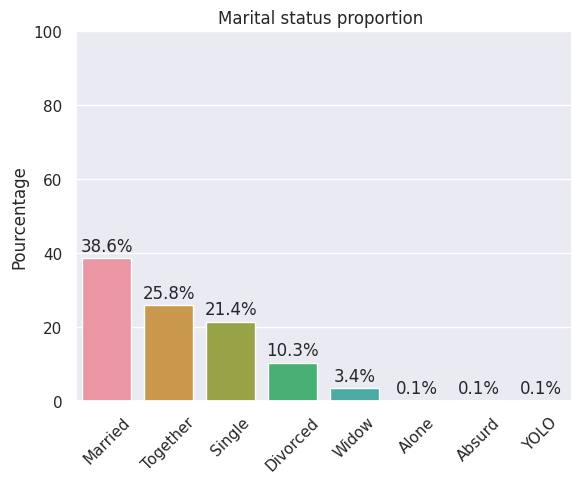

In [24]:
# Compter le nombre de personnes dans chaque catégorie
counts = campaign_df["Marital_Status"].value_counts()

# Calculer les pourcentages
percentages = counts / counts.sum() * 100

# Créer un graphique en barres avec les étiquettes de pourcentage
sns.barplot(x=percentages.index, y=percentages.values)
plt.ylim(0, 100)
plt.ylabel("Pourcentage")
plt.xticks(rotation=45)
plt.title("Marital status proportion ")

# Ajouter les étiquettes de pourcentage sur les barres
for i, v in enumerate(percentages.values):
    plt.text(i, v + 2, "{:.1f}%".format(v), ha="center")

plt.show()

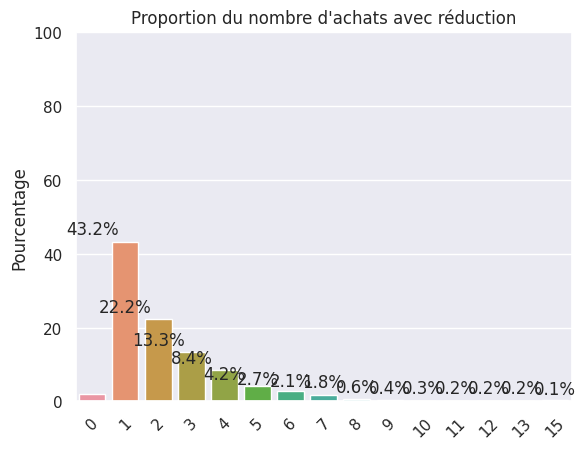

In [25]:
counts = campaign_df["NumDealsPurchases"].value_counts()

percentages = counts / counts.sum() * 100
plt.title("Proportion du nombre d'achats avec réduction")

sns.barplot(x=percentages.index, y=percentages.values)
plt.ylim(0, 100)
plt.ylabel("Pourcentage")
plt.xticks(rotation=45)

for i, v in enumerate(percentages.values):
    plt.text(i, v + 2, "{:.1f}%".format(v), ha="center")

plt.show()

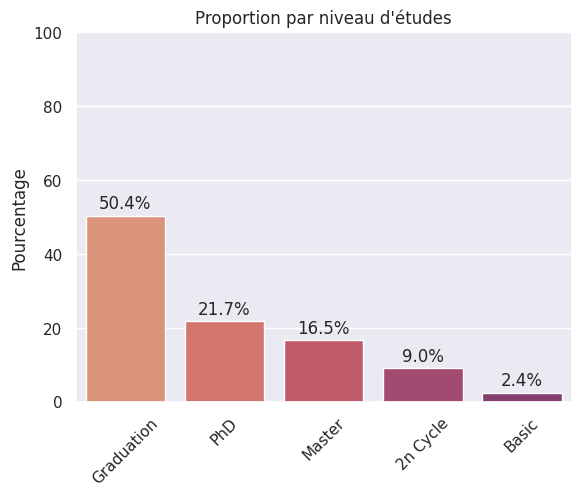

In [26]:
# Compter le nombre de personnes dans chaque catégorie
counts = campaign_df["Education"].value_counts()

# Calculer les pourcentages
percentages = counts / counts.sum() * 100


# Créer un graphique en barres avec les étiquettes de pourcentage
sns.barplot(x=percentages.index, y=percentages.values)
plt.ylim(0, 100)
plt.title("Proportion par niveau d'études")
plt.ylabel("Pourcentage")
plt.xticks(rotation=45)

# Ajouter les étiquettes de pourcentage sur les barres
for i, v in enumerate(percentages.values):
    plt.text(i, v + 2, "{:.1f}%".format(v), ha="center")

plt.show()

# Clustering

## Feature Selection

In [27]:
# Variance Treshold

# Selection des features
X = encoded_df.drop(["Education", "Marital_Status","Dt_Customer", "Age_bins", "Income_bins"], axis = 1)

# Définir le seuil de variance souhaité (par exemple, 0.5)
threshold = 100

# Créer un objet VarianceThreshold et le fit sur les données
selector = VarianceThreshold(threshold)
selector.fit(X)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features = X.columns[selector.get_support()]

# Afficher les fonctionnalités sélectionnées
print(selected_features)

Index(['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age'],
      dtype='object')


## Kmeans Clustering

In [28]:
X_selection = encoded_df[['Year_Birth', 'Income', 'Recency', 'Age', 'Complain',
        'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',
        'NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']]

In [29]:
# Training the K-means model
kmeans = KMeans(n_clusters=5).fit(X_selection)

# predict the cluster for each sample
labels_k = kmeans.predict(X_selection)

In [30]:
# Computing the Silhouette Score
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_selection, labels_k))
print("Calinski Harabasz Score: %0.3f" % calinski_harabasz_score(X_selection, labels_k))
print("db Score: %0.3f" % davies_bouldin_score(X_selection, labels_k))

Silhouette Coefficient: 0.535
Calinski Harabasz Score: 6346.064
db Score: 0.457


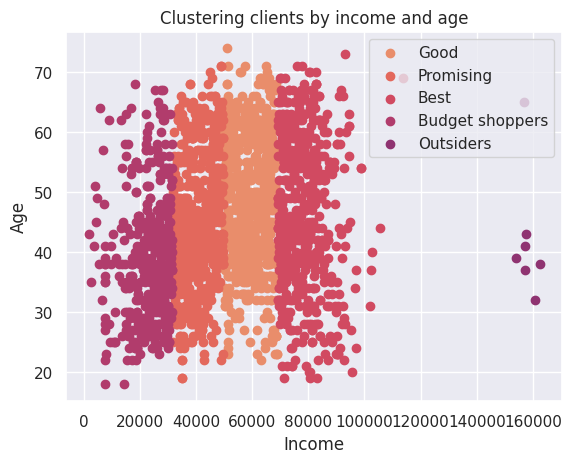

In [31]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'Age'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and age')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

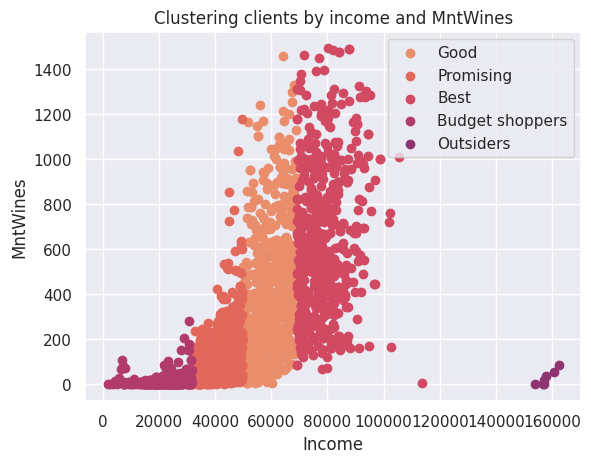

In [32]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'MntWines'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and MntWines')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

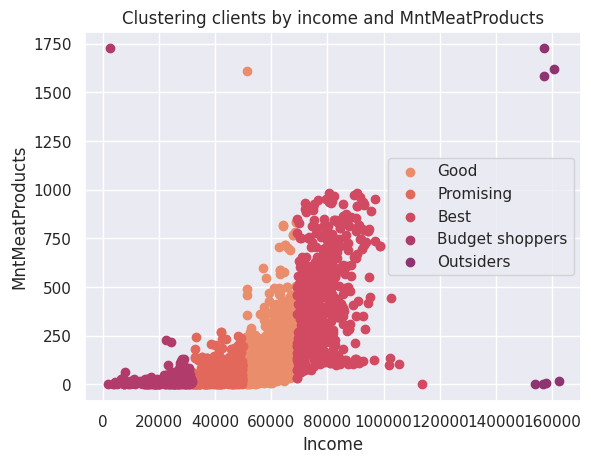

In [33]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'MntMeatProducts'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and MntMeatProducts')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

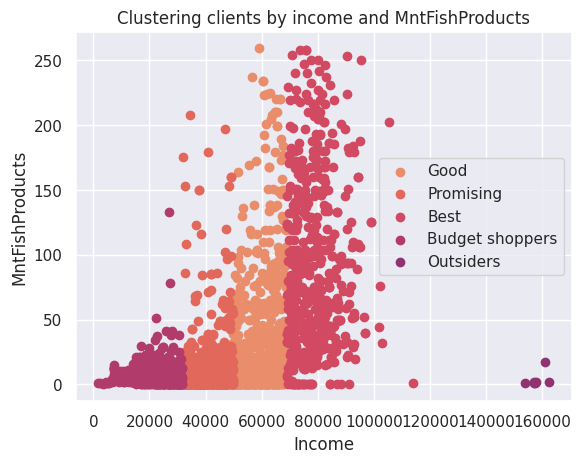

In [34]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'MntFishProducts'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and MntFishProducts')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

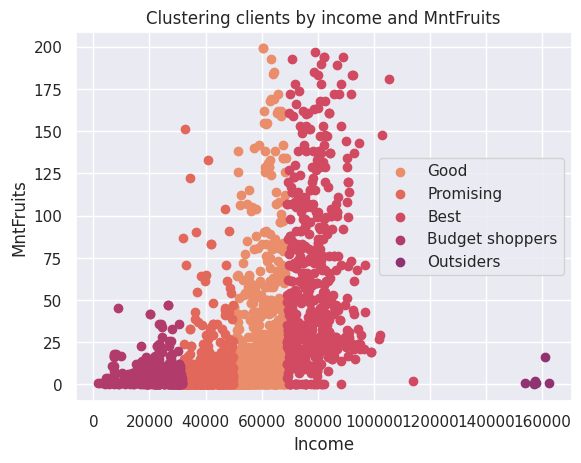

In [35]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'MntFruits'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and MntFruits')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

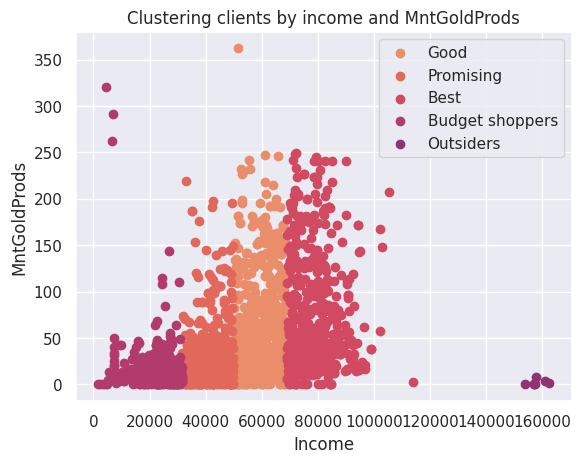

In [36]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'MntGoldProds'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and MntGoldProds')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

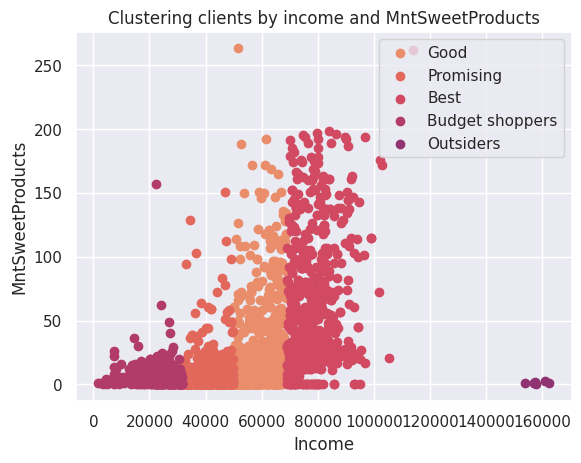

In [37]:
# Choose which features to plot against each other
feat1 = 'Income'
feat2 = 'MntSweetProducts'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X_selection[feat1], 'y': X_selection[feat2], 'label': labels_k})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend()
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Clustering clients by income and MntSweetProducts')
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])

# Show the plot
plt.show()

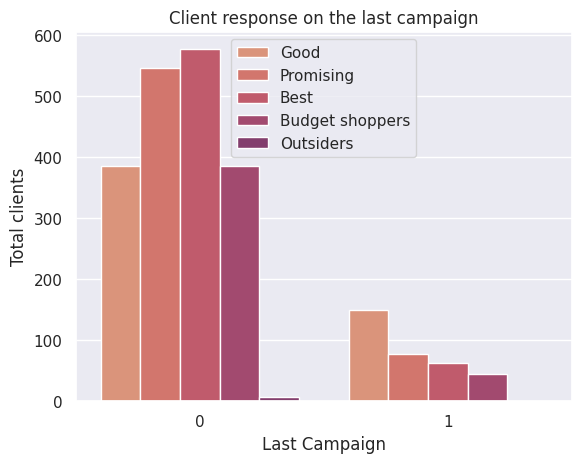

In [38]:
# Choose which feature to plot
feat = 'Response'

# Create a DataFrame with the feature and the cluster labels
df = pd.DataFrame({'x': X_selection[feat], 'label': labels_k})

# Set up the plot
fig, ax = plt.subplots()

# Plot the count of data points for each cluster
sns.countplot(x='x', hue='label', data=df, ax=ax)

# Add legend and axis labels
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])
ax.set_xlabel("Last Campaign")
ax.set_ylabel('Total clients')
ax.set_title('Client response on the last campaign')

# Show the plot
plt.show()

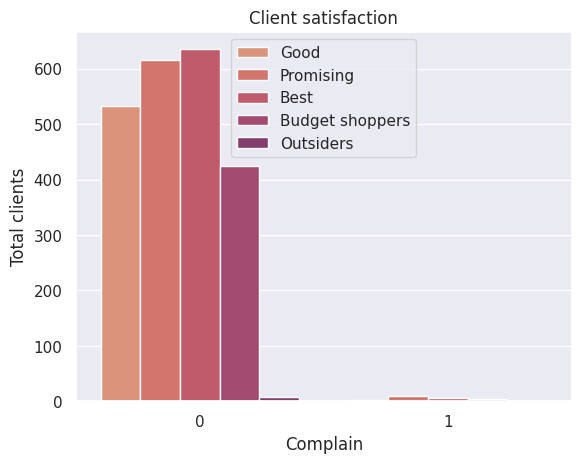

In [39]:
# Choose which feature to plot
feat = 'Complain'

# Create a DataFrame with the feature and the cluster labels
df = pd.DataFrame({'x': X_selection[feat], 'label': labels_k})

# Set up the plot
fig, ax = plt.subplots()

# Plot the count of data points for each cluster
sns.countplot(x='x', hue='label', data=df, ax=ax)

# Add legend and axis labels
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])
ax.set_xlabel(feat)
ax.set_ylabel('Total clients')
ax.set_title('Client satisfaction')

# Show the plot
plt.show()

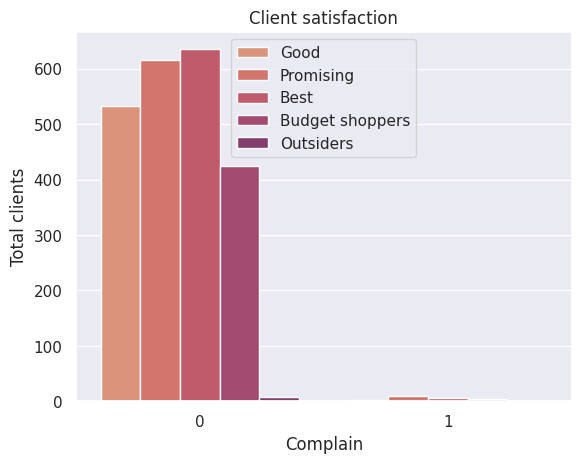

In [40]:
# Choose which feature to plot
feat = 'Complain'

# Create a DataFrame with the feature and the cluster labels
df = pd.DataFrame({'x': X_selection[feat], 'label': labels_k})

# Set up the plot
fig, ax = plt.subplots()

# Plot the count of data points for each cluster
sns.countplot(x='x', hue='label', data=df, ax=ax)

# Add legend and axis labels
ax.legend(labels=["Good","Promising","Best", "Budget shoppers", "Outsiders"])
ax.set_xlabel(feat)
ax.set_ylabel('Total clients')
ax.set_title('Client satisfaction')

# Show the plot
plt.show()

In [41]:
X_selection.columns

Index(['Year_Birth', 'Income', 'Recency', 'Age', 'Complain', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'],
      dtype='object')

## Silhouette

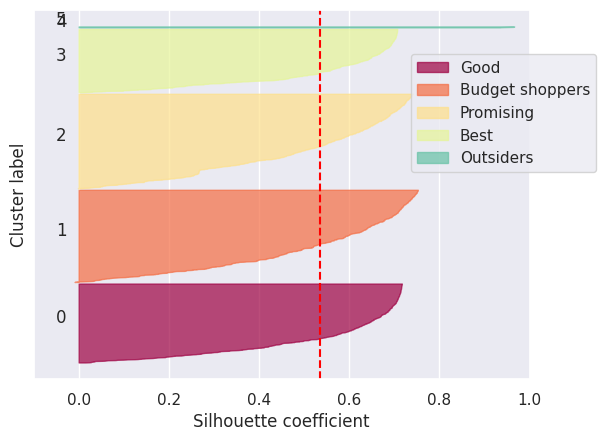

In [42]:
# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X_selection, labels_k)

# Compute the average silhouette score for each cluster
silhouette_avgs = []
for i in range(5):
    cluster_silhouette_vals = silhouette_vals[labels_k == i]
    silhouette_avgs.append(np.mean(cluster_silhouette_vals))

# Plot the silhouette scores for each cluster
y_lower = 10
fig, ax = plt.subplots()
for i in range(6):
    cluster_silhouette_vals = silhouette_vals[labels_k == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.get_cmap('Spectral')(float(i) / 5)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")
ax.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend(labels=["Good","Budget shoppers","Promising","Best", "Outsiders"])
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.15, 0.9))
plt.show()